# Exploratory Data Analysis on Haberman Dataset

## Objective

To explore the Haberman Cancer Survival Dataset and find which feature or combination of feature are helpfull in determining the status of a person in 5 years after the operation.

## Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Dataset

**The Data**

1)Title: Haberman's Survival Data\
2)Sources:
  (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)\
  (b) Date: March 4, 1999\
3)Information:
  The dataset contains cases from a study that was conducted between\
  1958 and 1970 at the University of Chicago's Billings Hospital on\
  the survival of patients who had undergone surgery for breast\
  cancer.\  
4)Number of Instances: 306\
  Number of Attributes: 4 (including the class attribute)\

5)Attribute Information:
  Age of patient at time of operation (numerical)\
  Patient's year of operation (year - 1900, numerical)\
  Number of positive axillary nodes detected (numerical)\
  Survival status (class attribute)\
      1 = the patient survived 5 years or longer\
      2 = the patient died within 5 year




Since the Survival Status(Class Attribute) is marked as '1' for 'the patient survived 5 years or longer' and '2' as 'the patient died within 5 years', so for better readability, we need to label the class as "Yes"= 1 (the patient survived 5 years or longer), and "No"= 2 (the patient died within 5 years).

In [2]:
dataset = pd.read_csv("haberman.csv")
print (dataset.shape)

(306, 4)


In [3]:
dataset.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(dataset.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [5]:
print(dataset['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [6]:
dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
dataset['status'] = dataset['status'].map({1:'Yes', 2:'No'})

In order for better readability ,we need to label the class as "Yes"= 1 (the patient survived 5 years or longer), 
and "No"= 2 (the patient died within 5 year)

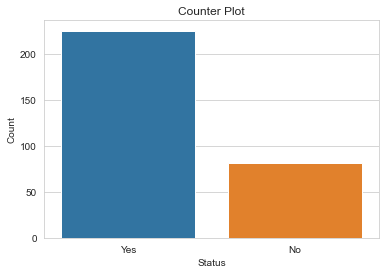

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='status' , data=dataset )
plt.title('Counter Plot')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


**Observatons:**

1)There are **No Missing Values** in the dataset.\
2)The dataset is **Imbalanced Dataset**.\
3)The **Minimum Age** of the patient is 30 year.\
4)The **Maximum Age** of the patient is 83 year.\
5)Around **50%** of the patients **aged between 44 to 61**.\
6)**75%** of the patients **have 4 positive nodes**.\
7)**25%** of the patients **have 0 positive nodes**.\
8)**More than 200 patients survived 5 years or longer** and **less than 100 patients died within 5 year**.

## 2-D Scatter Plot

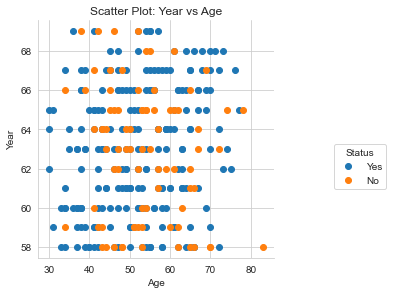

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="status", height=4) \
   .map(plt.scatter, "age", "year") 

plt.title('Scatter Plot: Year vs Age')
plt.xlabel('Age')
plt.ylabel('Year')
plt.legend(title='Status' , bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

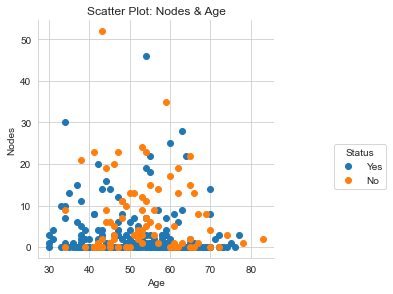

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") 

plt.title('Scatter Plot: Nodes & Age')
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.legend(title='Status' , bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

**Observations:**

1)From the above scatter plots,we can see that it does not clear much about the dataset because **the dataset is highly mixed up**.\
2)Also from the above scatter plots, we **can't find any linearly separable clusters**.\
3)Also we can't find any "if-else" conditions to build a simple model to classify the survival status of the patient.\
4)From Nodes vs Age scatter plot, we can see that there is **quite good concentration of data point at nodes=0**.

# Pair-Plot

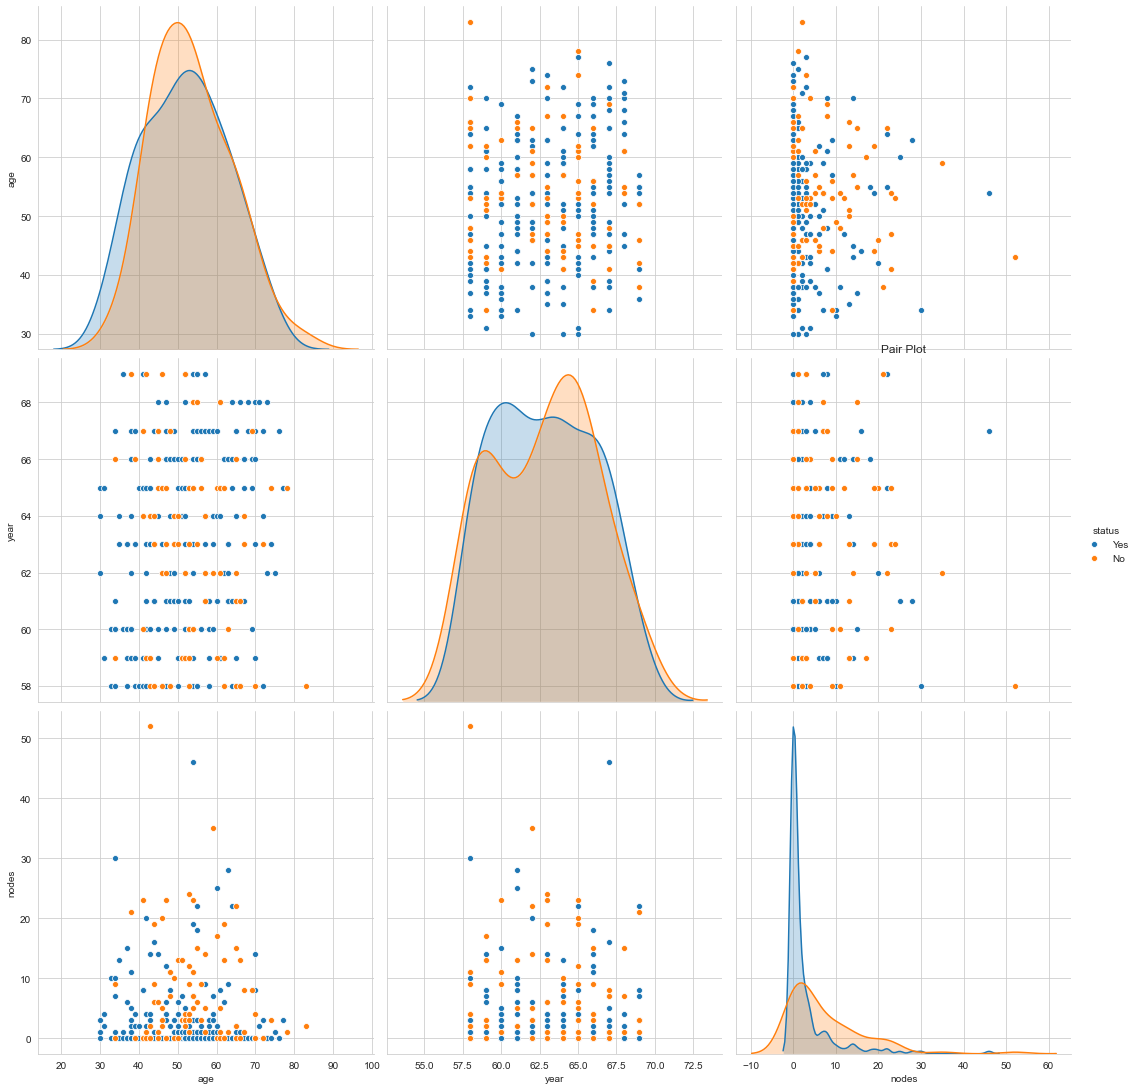

In [36]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="status", height=5)
plt.title('Pair Plot')
plt.show()

**Observations:**

1)**Age and Nodes are the important features** to identify wether the patient survived 5 years or longer 2 OR the patient died within 5 year.\
3)Among Age and Nodes , **Nodes is the most important feature**.\
2)Patients having **nodes less than 5** are more likely to **survive 5 years or longer**.

## Histogram , PDF and CDF

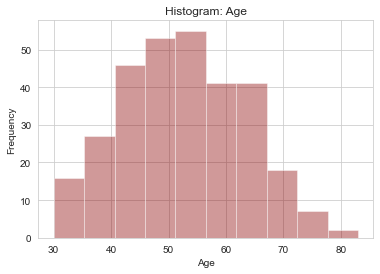

In [12]:
sns.distplot(dataset['age'] , kde = False, color='darkred',bins=10)
plt.title('Histogram: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The **maximum number of patients** that undergone surgery for breast cancer are of **age between 45-55 year**. 

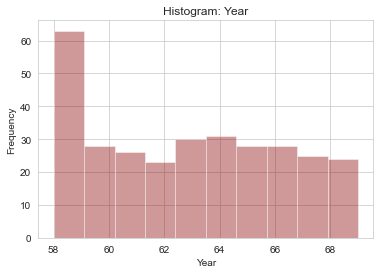

In [13]:
sns.distplot(dataset['year'] , kde = False, color='darkred',bins=10)
plt.title('Histogram: Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The **maximum number of patients** that undergone surgery for breast cancer are in the **year between 1958-1960**. 

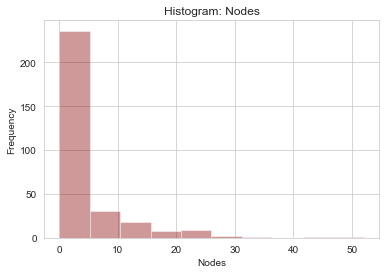

In [14]:
sns.distplot(dataset['nodes'] , kde = False, color='darkred',bins=10)
plt.title('Histogram: Nodes')
plt.xlabel('Nodes')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The **maximum number of positive axillary nodes** detected in the patients are **less than 10**.

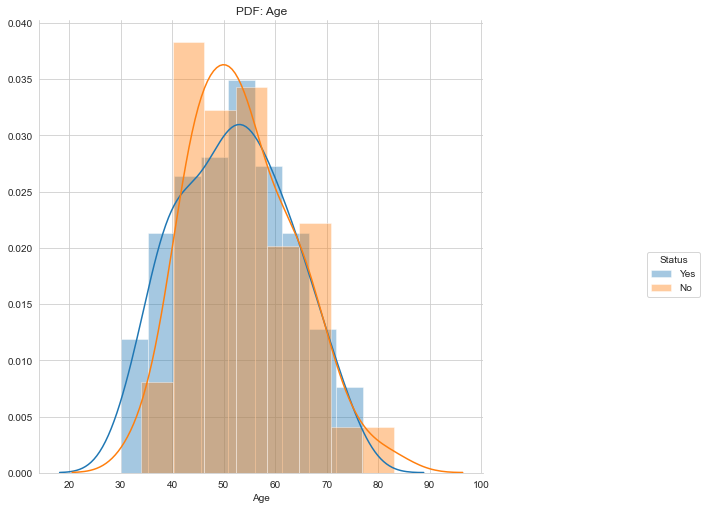

In [15]:
sns.FacetGrid(dataset, hue="status", height=7) \
   .map(sns.distplot, "age") 
plt.title('PDF: Age')
plt.xlabel('Age')
plt.legend(title= 'Status' ,bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

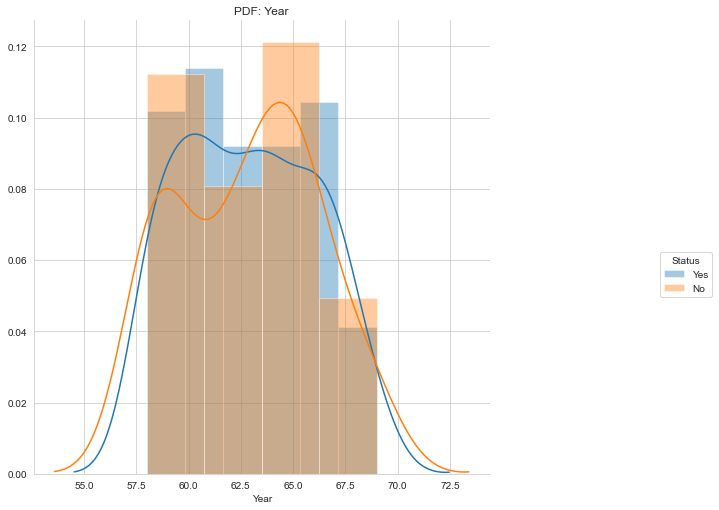

In [16]:
sns.FacetGrid(dataset, hue="status", height=7) \
   .map(sns.distplot, "year") 
plt.title('PDF: Year')
plt.xlabel('Year')
plt.legend(title= 'Status' ,bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

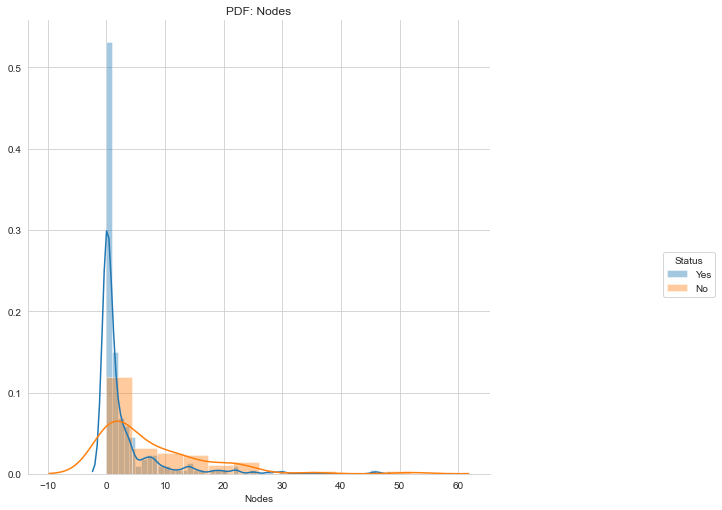

In [17]:
sns.FacetGrid(dataset, hue="status", height=7) \
   .map(sns.distplot, "nodes") 
plt.title('PDF: Nodes')
plt.xlabel('Nodes')
plt.legend(title= 'Status' ,bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

**Observations:**

1)From the above histograms we can see that there is a **significant amount of overlapping** between the data points, therefore   classification of the 'status' is difficult for variables: age and year.\
2)Patients having **less number of nodes survived 5 or longer years** after the treatment.\
3)**Patients less than age 40 are more likely to survive**.

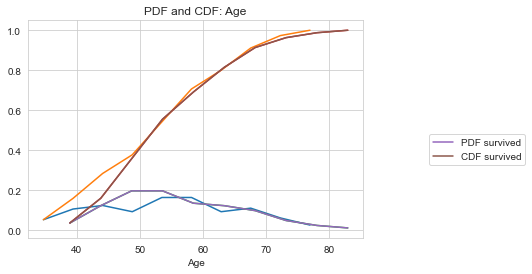

In [32]:
status_1 = dataset.loc[dataset["status"] == 'Yes']
status_2 = dataset.loc[dataset["status"] == 'No']

counts, bin_edges = np.histogram(status_1['age'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(status_2['age'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age')
plt.title('PDF and CDF: Age')
arr1, = plt.plot(bin_edges[1:], pdf);
arr2, = plt.plot(bin_edges[1:], cdf)
plt.legend([arr1,arr2], ['PDF survived','CDF survived'] , bbox_to_anchor=(1, 0., 0.5, 0.5)) 
plt.show()

#Reference: https://stackoverflow.com/questions/57578336/how-to-add-legend-to-below-plot

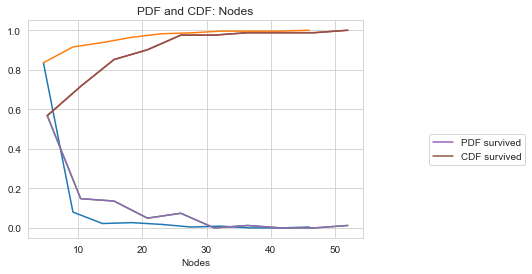

In [33]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(status_2['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Nodes')
plt.title('PDF and CDF: Nodes')
arr1, = plt.plot(bin_edges[1:], pdf);
arr2, = plt.plot(bin_edges[1:], cdf)
plt.legend([arr1,arr2], ['PDF survived','CDF survived'] , bbox_to_anchor=(1, 0., 0.5, 0.5)) 
plt.show()

#Reference: https://stackoverflow.com/questions/57578336/how-to-add-legend-to-below-plot

**Observations:**

1)From the above PDF & CDF ,we can see that close to 82% of the survived patients have nodes less than or equal to 5 nodes.\


## Box plot and Whiskers

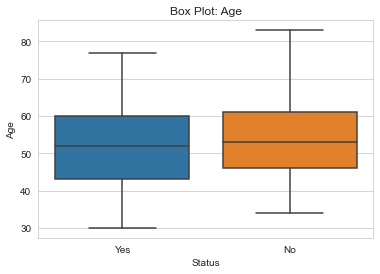

In [22]:
sns.boxplot(x='status',y='age', data=dataset)
plt.title('Box Plot: Age')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

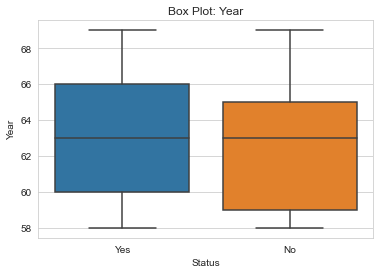

In [23]:
sns.boxplot(x='status',y='year', data=dataset)
plt.title('Box Plot: Year')
plt.xlabel('Status')
plt.ylabel('Year')
plt.show()

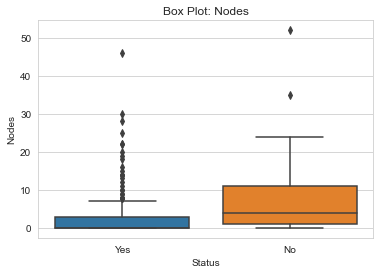

In [24]:
sns.boxplot(x='status',y='nodes', data=dataset)
plt.title('Box Plot: Nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.show()

## Violin Plot

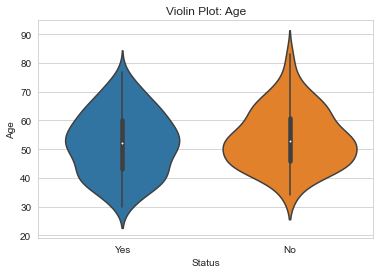

In [25]:
sns.violinplot(x="status", y="age", data=dataset, height=8)
plt.title('Violin Plot: Age')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

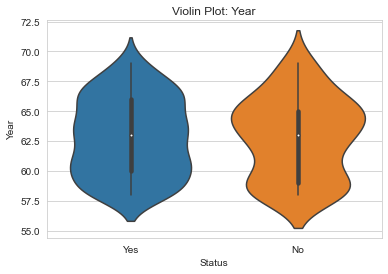

In [26]:
sns.violinplot(x="status", y="year", data=dataset, height=8)
plt.title('Violin Plot: Year')
plt.xlabel('Status')
plt.ylabel('Year')
plt.show()

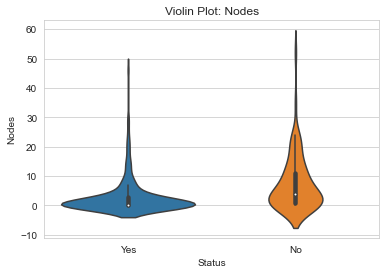

In [27]:
sns.violinplot(x="status", y="nodes", data=dataset, height=8)
plt.title('Violin Plot: Nodes')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.show()

**Observations:**

1)Since the data points are very overlappig, no major conclusion could be drawnby looking at above Box Plots & Violin Plots.\
2)Patients having less than 5 nodes are more likely to survive.As the number of nodes increases the probability of surviving decreses significantly.

# Conclusion

**1)The maximum number of patients that undergone surgery for breast cancer are of age between 45-55 year.\
2)The maximum number of patients that undergone surgery for breast cancer are in the year between 1958-1960.\
3)Patients with nodes less than 5 are more likely to survive irrespective of there age.\
4)Patients who are older than 50 and have nodes more than 5 are more likely to die.\
5)Patients less than age 40 are more likely to survive.\
6)From the given dataset, more than 200 patients survived 5 years or longer and less than 100 patients died within 5 year of the surgery.**

